# AR Model Analysis on Microsoft Stock Data

In [11]:

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = 'Microsoft_Stock.csv'



In [12]:
# Define parser function for dates
def parser(s):
    return datetime.strptime(s, '%m/%d/%Y %H:%M:%S')

# Read the dataset without 'squeeze'
series = pd.read_csv(file_path, parse_dates=[0], index_col=0, date_parser=parser)

# Extracting only the relevant column, assuming it's the "Close" price
series = series['Close']


C:\Users\Sanjay B\AppData\Local\Temp\ipykernel_11660\2224765826.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv(file_path, parse_dates=[0], index_col=0, date_parser=parser)


In [13]:
# Differencing the series to make it stationary
series = series.diff().diff().dropna()



ADF Statistic: -15.445536
p-value: 0.000000


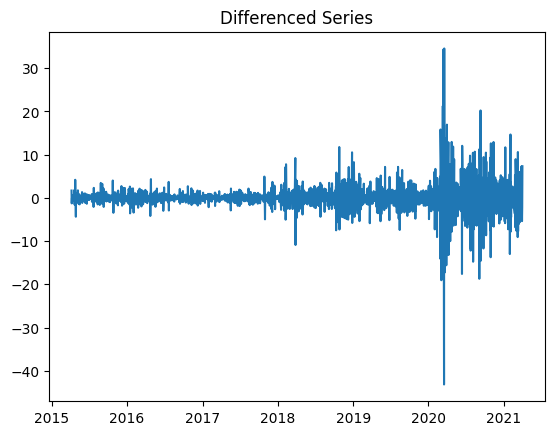

In [14]:
# Function to perform ADF test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

# Perform the ADF test
perform_adf_test(series)

# Plot the differenced series
plt.plot(series)
plt.title("Differenced Series")
plt.show()



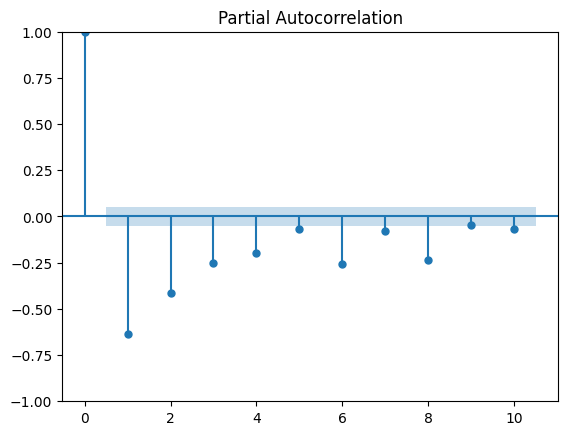

c:\Users\Sanjay B\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sanjay B\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sanjay B\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sanjay B\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index 

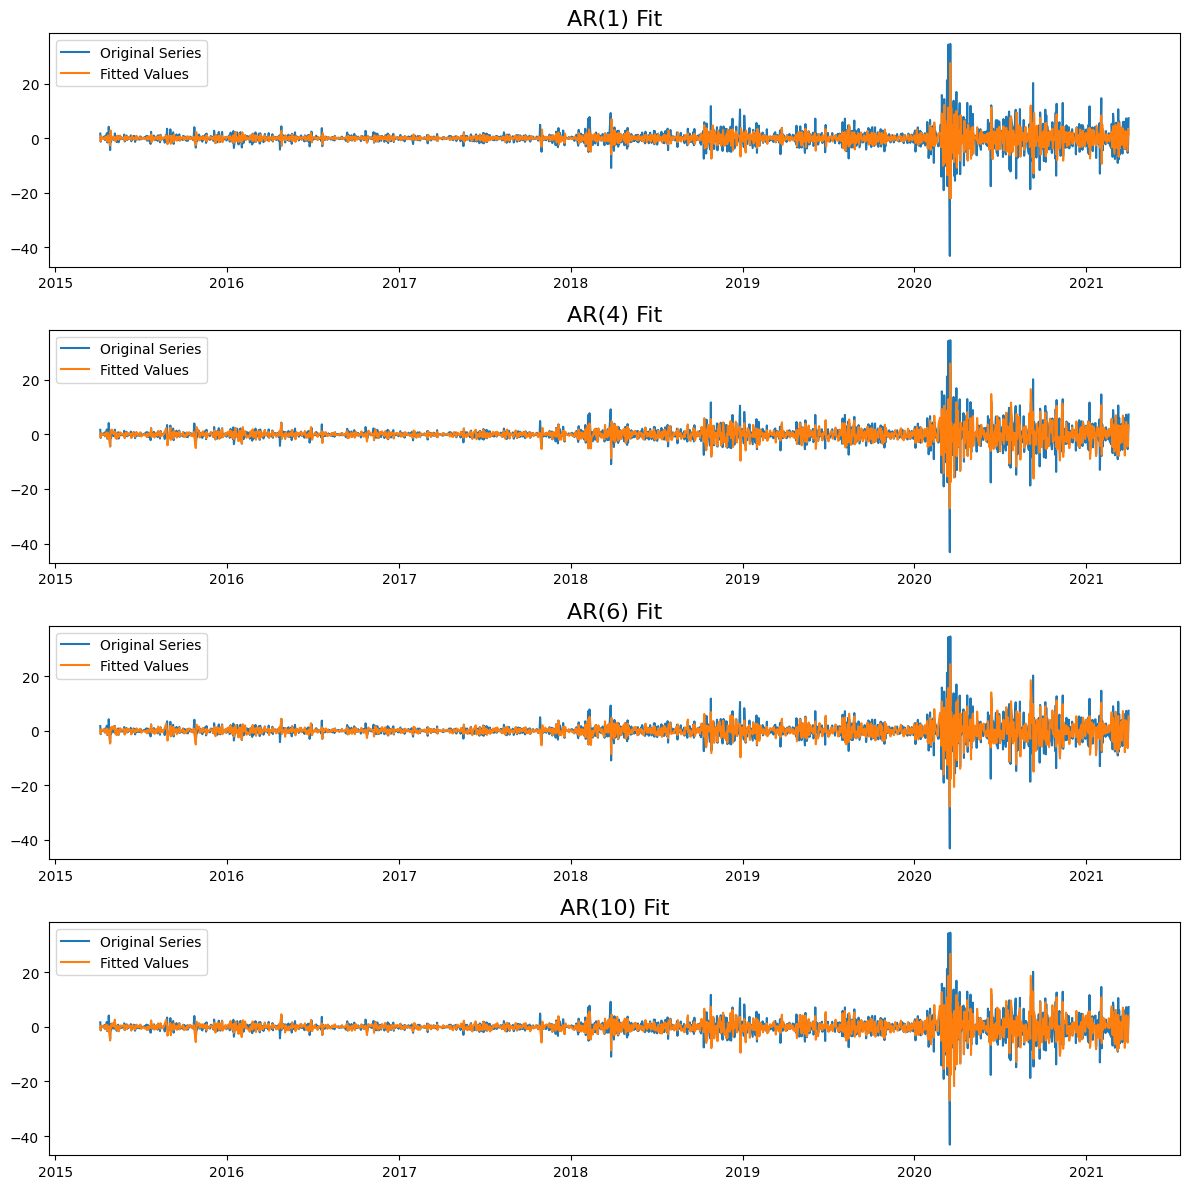

In [15]:
# Plot PACF
plot_pacf(series, lags=10)
plt.show()

# Fit AR models with different orders
ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

plt.figure(figsize=(12, 12))

for idx, ar_order in enumerate(ar_orders):
    # Create AR(p) model using ARIMA with no differencing and no moving average component
    ar_model = ARIMA(series, order=(ar_order, 0, 0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit

    # Plot the fitted model
    plt.subplot(4, 1, idx + 1)
    plt.plot(series, label='Original Series')
    plt.plot(ar_model_fit.fittedvalues, label='Fitted Values')
    plt.title(f'AR({ar_order}) Fit', fontsize=16)
    plt.legend()

plt.tight_layout()
plt.show()



In [16]:
# AIC comparison
for ar_order in ar_orders:
    print(f'AIC for AR({ar_order}): {fitted_model_dict[ar_order].aic}')

    

AIC for AR(1): 7498.762065654715
AIC for AR(4): 7058.855714119958
AIC for AR(6): 6948.434963157226
AIC for AR(10): 6847.5417628539635


In [17]:
# BIC comparison
for ar_order in ar_orders:
    print(f'BIC for AR({ar_order}): {fitted_model_dict[ar_order].bic}')


BIC for AR(1): 7514.719673031019
BIC for AR(4): 7090.7709288725655
BIC for AR(6): 6990.988582827369
BIC for AR(10): 6911.3721923591775
